In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

In [10]:
df = pd.read_csv("../data/total_valor.csv")
df['date'] = pd.to_datetime(df['date'], format='%b-%Y')
df.set_index('date', inplace=True)

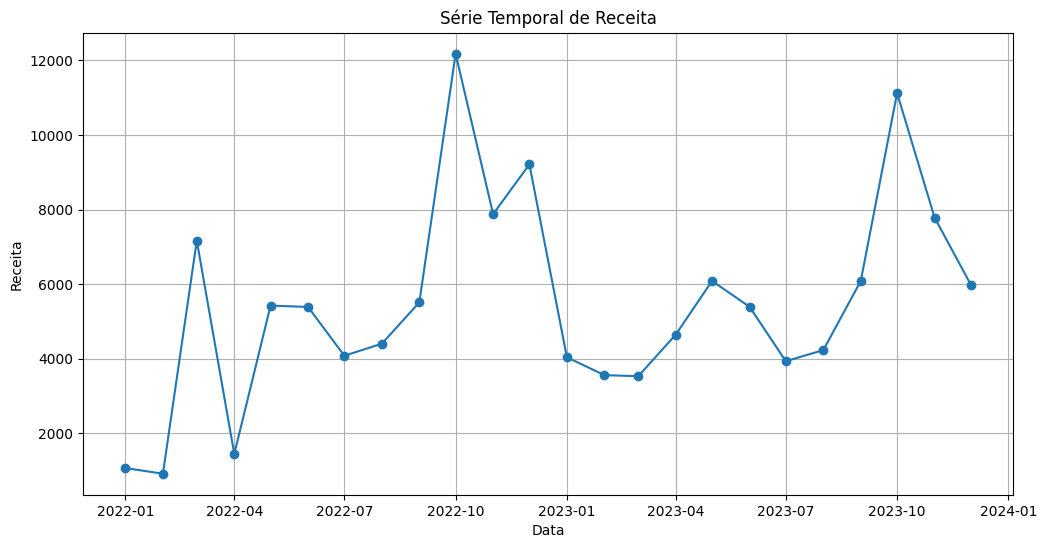

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['revenue'], marker='o')
plt.title('Série Temporal de Receita')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.grid()
plt.show()

In [23]:
y = df['revenue']
divisor_index = int(len(df) * 0.8)

training_y = y.iloc[:divisor_index]
test_y = y.iloc[divisor_index:]

model = auto_arima(
    y = training_y, 
    seasonal=True,
    m=12,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)

previsao = model.predict(n_periods=12)

previsao

/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/pmdarima/arima/utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (7) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
/home/guilh

2023-08-01     4401.0
2023-09-01     5511.0
2023-10-01    12177.0
2023-11-01     7877.0
2023-12-01     9210.0
2024-01-01     4038.0
2024-02-01     3559.0
2024-03-01     3531.0
2024-04-01     4645.0
2024-05-01     6085.0
2024-06-01     5392.0
2024-07-01     3933.0
Freq: MS, dtype: float64

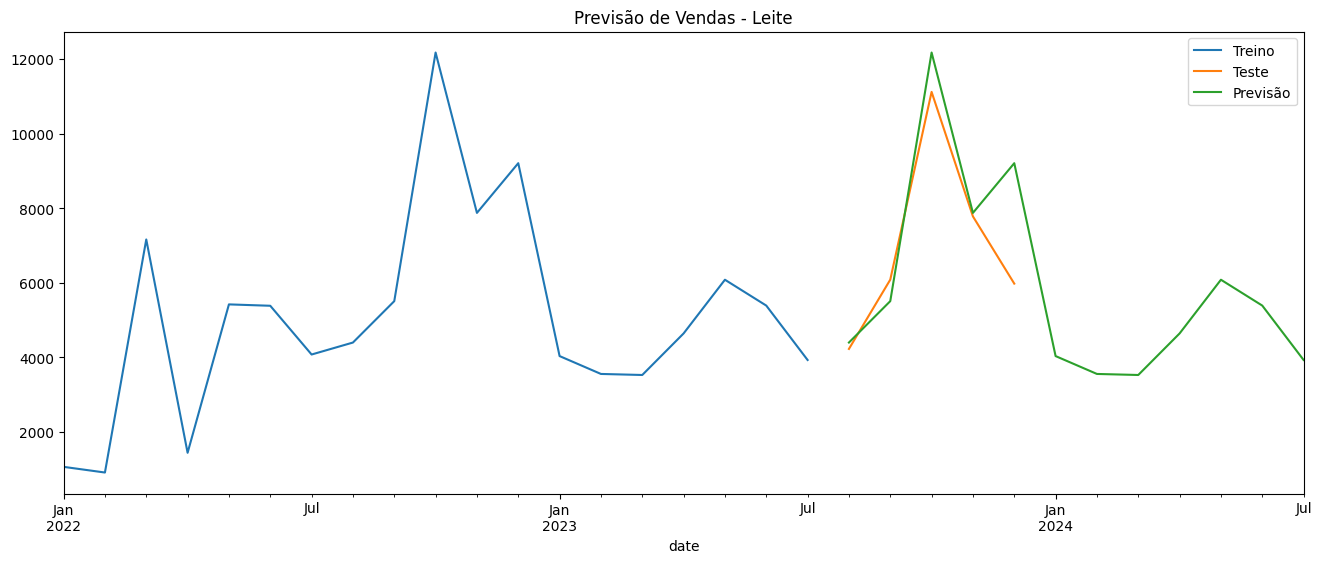

In [24]:
training_y.plot(figsize=(16,6), label='Treino')
test_y.plot(label = 'Teste')
previsao.plot(label='Previsão')
plt.title('Previsão de Vendas - Leite')
plt.legend()
plt.show()